In [9]:
!pip install tensorflow matplotlib scikit-learn numpy

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split

In [11]:
!pip install tensorflow_datasets

In [15]:
import tensorflow_datasets as tfds

(ds_train,ds_test),ds_info=tfds.load(
    'emnist/balanced',
    split=['train','test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.NGOGNY_3.1.0/emnist-train.tfrecord*...:   0%|  …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.NGOGNY_3.1.0/emnist-test.tfrecord*...:   0%|   …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/balanced/3.1.0. Subsequent calls will reuse this data.


In [16]:
def preprocess(image,label):
  image=tf.cast(image,tf.float32)/255.0
  image=tf.image.rot90(image,k=3)
  return image,label

ds_train=ds_train.map(preprocess).batch(128).prefetch(tf.data.AUTOTUNE)
ds_test=ds_test.map(preprocess).batch(128).prefetch(tf.data.AUTOTUNE)

In [18]:
model=models.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(ds_info.features['label'].num_classes,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 229,807 (897.68 KB)

 Trainable params: 229,807 (897.68 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history=model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test
)

Epoch 1/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 113s 126ms/step - accuracy: 0.4620 - loss: 1.9398 - val_accuracy: 0.8180 - val_loss: 0.5557
Epoch 2/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 120s 101ms/step - accuracy: 0.7594 - loss: 0.7514 - val_accuracy: 0.8421 - val_loss: 0.4740
Epoch 3/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 89s 101ms/step - accuracy: 0.7951 - loss: 0.6278 - val_accuracy: 0.8514 - val_loss: 0.4321
Epoch 4/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 93s 105ms/step - accuracy: 0.8131 - loss: 0.5656 - val_accuracy: 0.8613 - val_loss: 0.4092
Epoch 5/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 138s 101ms/step - accuracy: 0.8260 - loss: 0.5243 - val_accuracy: 0.8650 - val_loss: 0.3954
Epoch 6/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 141s 100ms/step - accuracy: 0.8337 - loss: 0.4918 - val_accuracy: 0.8687 - val_loss: 0.3874
Epoch 7/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 144s 102ms/step - accuracy: 0.8409 - loss: 0.4675 - val_accuracy: 0.8718 - val_loss: 0.3771
Epoch 8/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 141s 100ms/step - accuracy: 0.8481 - l

In [20]:
test_loss,test_acc=model.evaluate(ds_test)
print(f"Test accuracy: {test_acc:.4f}")

147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.8777 - loss: 0.3573
Test accuracy: 0.8745


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 


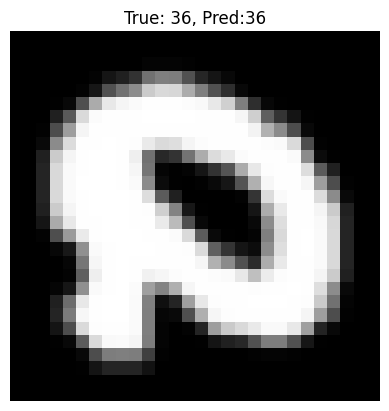

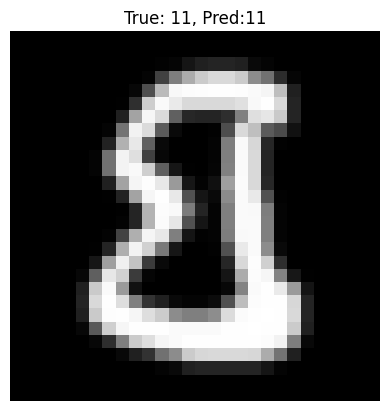

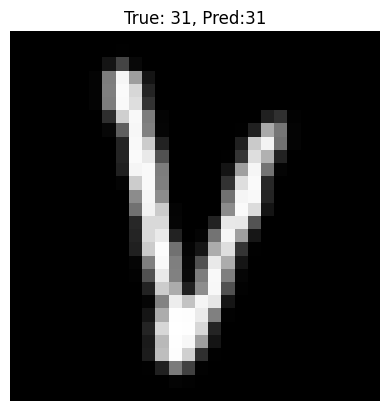

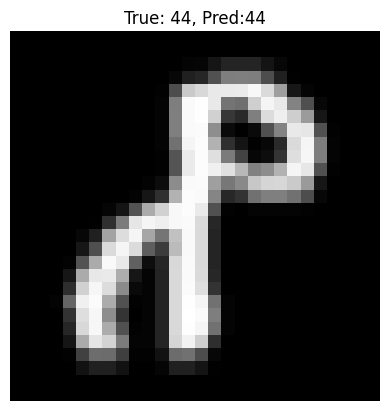

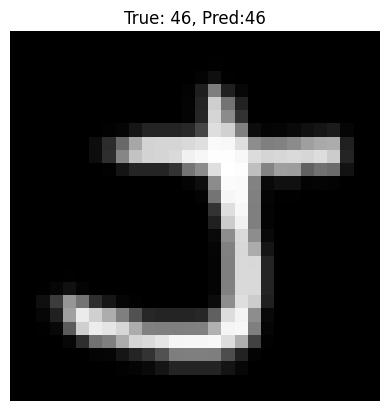

In [21]:
for image, labels in ds_test.take(1):
  prediction=model.predict(image)
  for i in range(5):
    plt.imshow(image[i].numpy().squeeze(),cmap='gray')
    plt.title(f"True: {labels[i].numpy()}, Pred:{np.argmax(prediction[i])}")
    plt.axis('off')
    plt.show()